In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


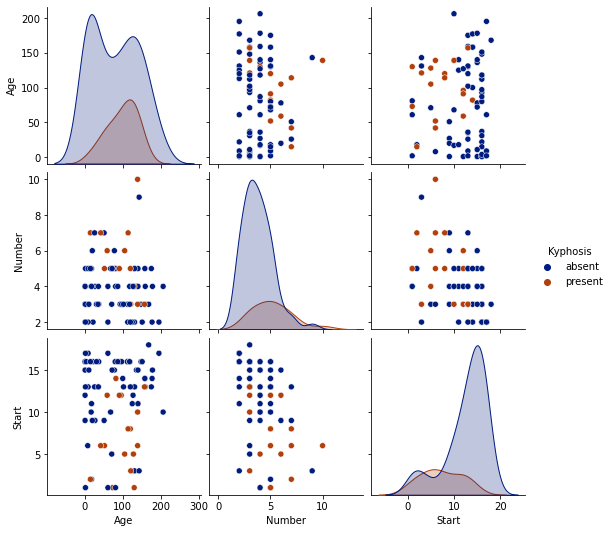

In [6]:
sns.pairplot(df, hue = 'Kyphosis', palette = 'dark')

Let's peform the train test split

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Let's train a single decision tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Let's evaluate our decision tree

In [17]:
predictions = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

      absent       0.90      0.95      0.92        19
     present       0.80      0.67      0.73         6

    accuracy                           0.88        25
   macro avg       0.85      0.81      0.83        25
weighted avg       0.88      0.88      0.88        25



In [20]:
print(confusion_matrix(predictions, y_test))

[[18  1]
 [ 2  4]]


In [22]:
print(f'Accuracy Score: {accuracy_score(predictions, y_test)}')

Accuracy Score: 0.88


Let's perform some tree visualisations

In [23]:
from sklearn import tree

In [24]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [28]:
class_names_ = ['present', 'absent']

In [29]:
class_names_

['present', 'absent']

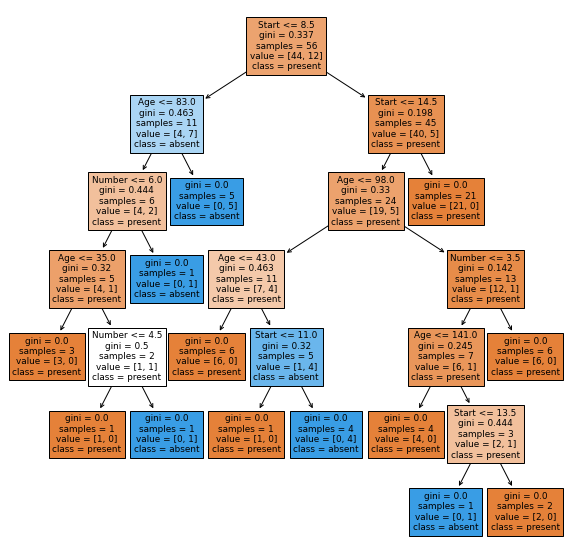

In [30]:
fig = plt.figure(figsize = (10, 10))

tplot = tree.plot_tree(dtree, feature_names = features, class_names = class_names_, 
                      filled = True)

RANDOM FORESTS

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier()

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rfc_pred = rfc.predict(X_test)

In [36]:
print(confusion_matrix(rfc_pred, y_test))

[[17  2]
 [ 3  3]]


In [37]:
print(classification_report(rfc_pred, y_test))

              precision    recall  f1-score   support

      absent       0.85      0.89      0.87        19
     present       0.60      0.50      0.55         6

    accuracy                           0.80        25
   macro avg       0.72      0.70      0.71        25
weighted avg       0.79      0.80      0.79        25



In [38]:
print(f'Acuracy Score:  {(accuracy_score(rfc_pred, y_test))}')

Acuracy Score:  0.8
